# NLP 기초대회 미션 1 - 탐색적 데이터 분석(EDA)



**데이터분석(EDA) 미션 : KLUE STS 데이터셋에 대한 간단한 분석을 수행합니다**

**미션 개요**
- 자연어처리 EDA 배우기

**실습 배경 및 목적**
- pandas를 활용한 데이터 분석
- 데이터 분석 결과 시각화
- 자연어처리에서의 데이터 분석

**데이터셋(https://klue-benchmark.com/tasks/67/overview/description)**
- KLUE의 Semantic Textual Similarity(STS) 데이터셋
- 입력 : 두 문장
- 출력 : 두 문장의 유사도
- 학습 데이터 : 11,668개
- 검증 데이터 : 519개(평가 데이터가 비공개이므로 학습에서 평가데이터로 활용함)
- 평가 데이터 : 1,037개(비공개)
- License : <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />

**모델**
- [klue/roberta-small](https://huggingface.co/klue/roberta-small) 모델과 토크나이저 활용

# 환경설정

In [2]:
# !pip install transformers
# !git clone https://github.com/KLUE-benchmark/KLUE.git

In [3]:
import json

import pandas as pd
from matplotlib import pyplot as plt

from tqdm import tqdm
from transformers import AutoTokenizer

# 사용 함수 정의

In [4]:
# json 데이터를 pandas 형태로 읽어옵니다
def read_json(data_type):
    with open(f'./KLUE/klue_benchmark/klue-sts-v1.1/klue-sts-v1.1_{data_type}.json', 'r', encoding='utf-8') as file:
        json_data = json.load(file)

    data = []
    for item in tqdm(json_data, desc='read json', total=len(json_data)):
        data.append([item['source'], item['sentence1'], item['sentence2'], item['labels']['label'], item['labels']['binary-label']])

    df = pd.DataFrame(data, columns=['source', 'sentence1', 'sentence2', 'label', 'binary_label'])

    return df

In [5]:
# 입력의 두 문장을 토크나이징하여 길이와 unk 토큰의 개수를 분석합니다
def tokenizing(df):
    tokenizer = AutoTokenizer.from_pretrained('klue/roberta-small')

    sentence1_len = []
    sentence2_len = []
    sentence1_unk = []
    sentence2_unk = []
    for i, item in df.iterrows():
        sentence1 = tokenizer(item['sentence1'])['input_ids']
        sentence2 = tokenizer(item['sentence2'])['input_ids']

        sentence1_len.append(len(sentence1))
        sentence2_len.append(len(sentence2))

        sentence1_unk.append(sentence1.count(tokenizer.unk_token_id))
        sentence2_unk.append(sentence2.count(tokenizer.unk_token_id))

    tokenized_df = pd.DataFrame([sentence1_len, sentence2_len, sentence1_unk, sentence2_unk]).transpose()
    tokenized_df.columns = ['1_len', '2_len', '1_unk', '2_unk']
    print(tokenized_df.describe())

In [6]:
# label의 분포를 box plot으로 그립니다
def draw_box_plot(df):
    label_list = [row['label'] for i, row in df.iterrows()]

    plt.boxplot(label_list)
    plt.title("Boxplot for target label")
    plt.show()

In [7]:
# pandas 데이터를 가지고 그래프를 그리는 함수입니다
def draw_graph(df):
    source_binary = {source:[0, 0] for source in sorted(df['source'].unique())}
    for i, item in df.iterrows():
        source_binary[item['source']][item['binary_label']] += 1
    source_binary_df = pd.DataFrame(source_binary).transpose()

    # source의 분포
    df['source'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # source별 binary label의 분포
    source_binary_df.plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # label의 분포
    df['label'].plot(kind='hist', rot=20, figsize=(8, 6))
    plt.show()
    # binary label의 분포
    df['binary_label'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()

# 데이터 분석

In [8]:
# 데이터 읽기
train_df = read_json('train')
dev_df = read_json('dev')

read json: 100%|███████████████████████████████████████████████████| 519/519 [00:00<00:00, 1986171.33it/s]


In [9]:
# label과 binary label 통계 분석
print(train_df.describe())
print(dev_df.describe())

              label  binary_label
count  11668.000000  11668.000000
mean       2.216138      0.480117
std        1.750278      0.499626
min        0.000000      0.000000
25%        0.200000      0.000000
50%        2.700000      0.000000
75%        3.900000      1.000000
max        5.000000      1.000000
            label  binary_label
count  519.000000    519.000000
mean     2.484586      0.423892
std      1.479210      0.494650
min      0.000000      0.000000
25%      1.150000      0.000000
50%      2.600000      0.000000
75%      3.800000      1.000000
max      5.000000      1.000000


train


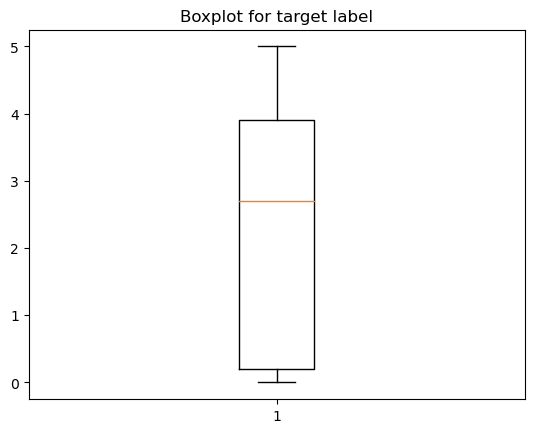

test


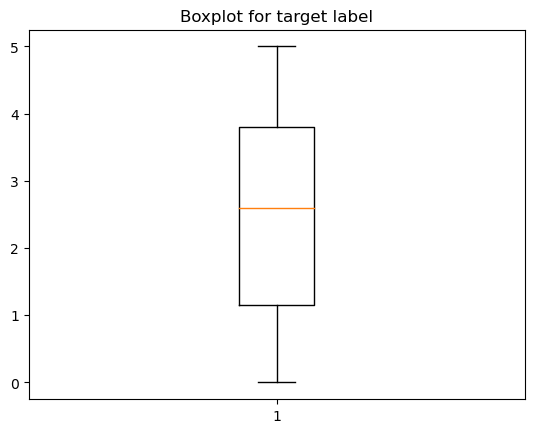

In [10]:
# label 분포 확인
print("train")
draw_box_plot(train_df)

print("test")
draw_box_plot(dev_df)

In [11]:
# 토크나이징 결과 분석
print("train")
tokenizing(train_df)

print("test")
tokenizing(dev_df)

train


              1_len         2_len         1_unk         2_unk
count  11668.000000  11668.000000  11668.000000  11668.000000
mean      20.076534     19.556222      0.011827      0.009256
std        8.831861      8.296274      0.112769      0.100994
min        5.000000      5.000000      0.000000      0.000000
25%       14.000000     14.000000      0.000000      0.000000
50%       17.000000     17.000000      0.000000      0.000000
75%       22.000000     22.000000      0.000000      0.000000
max       81.000000     70.000000      2.000000      2.000000
test
            1_len       2_len       1_unk       2_unk
count  519.000000  519.000000  519.000000  519.000000
mean    19.473988   19.416185    0.005780    0.005780
std      8.378751    8.170257    0.075882    0.075882
min      6.000000    7.000000    0.000000    0.000000
25%     14.500000   14.000000    0.000000    0.000000
50%     17.000000   17.000000    0.000000    0.000000
75%     21.000000   22.000000    0.000000    0.000000
max  

In [12]:
# source 종류 파악
print(f"train source unique : {sorted(train_df['source'].unique())}")
print(f"dev source unique : {sorted(dev_df['source'].unique())}")

train source unique : ['airbnb-rtt', 'airbnb-sampled', 'paraKQC-para', 'paraKQC-sampled', 'policy-rtt', 'policy-sampled']
dev source unique : ['airbnb-rtt', 'airbnb-sampled', 'paraKQC-para', 'paraKQC-sampled', 'policy-rtt', 'policy-sampled']


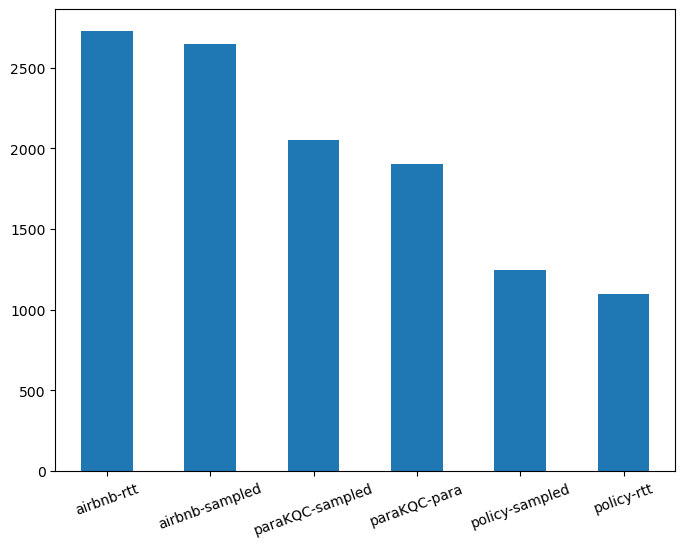

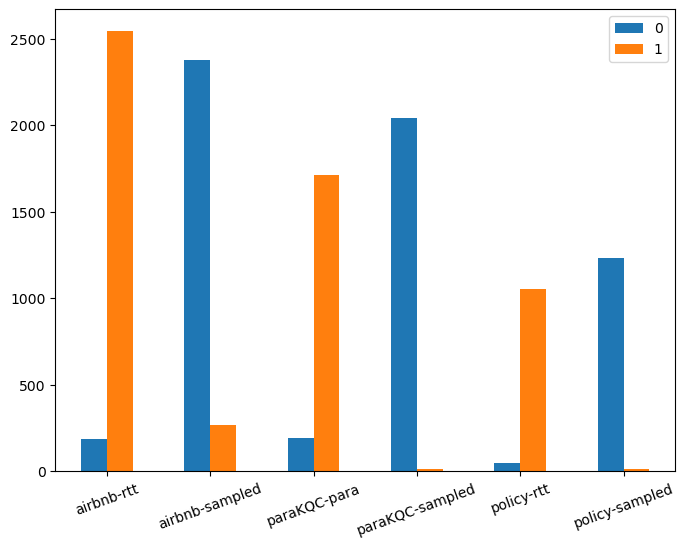

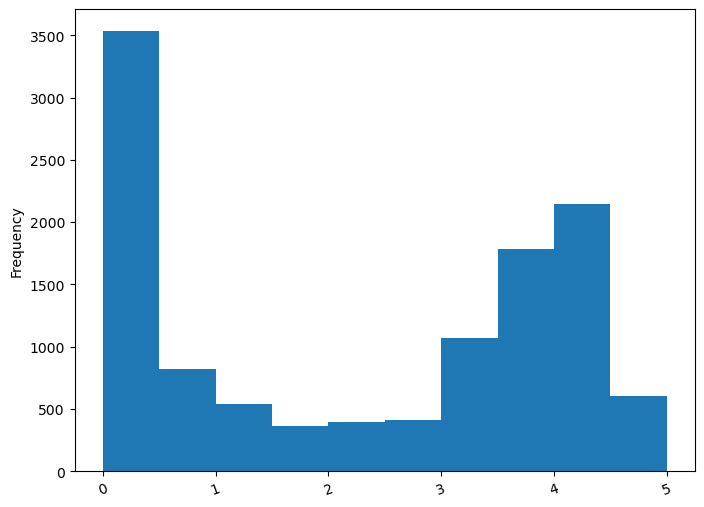

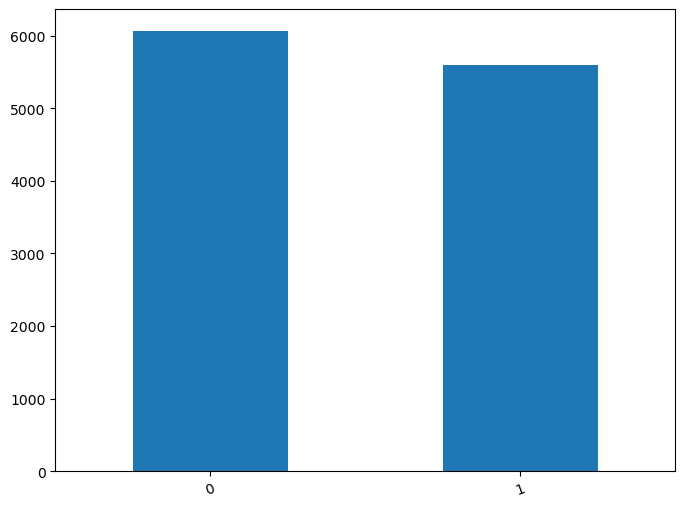

In [13]:
draw_graph(train_df)

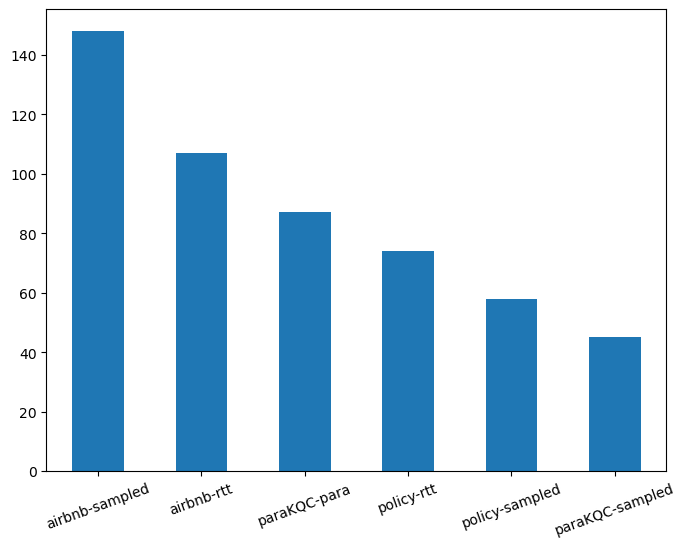

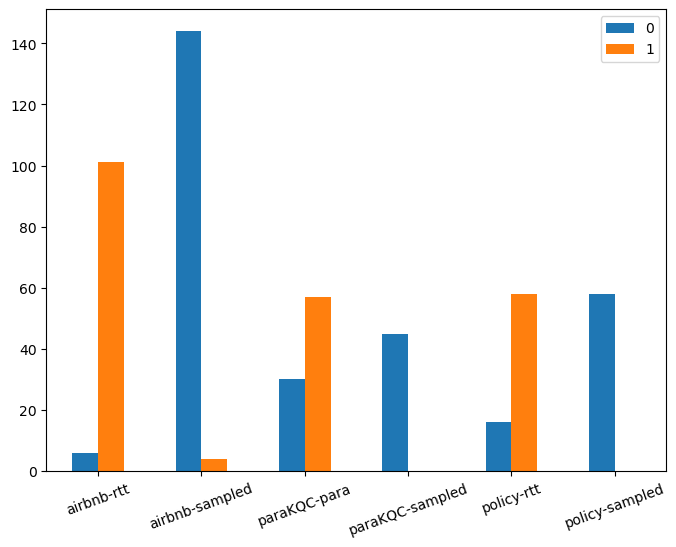

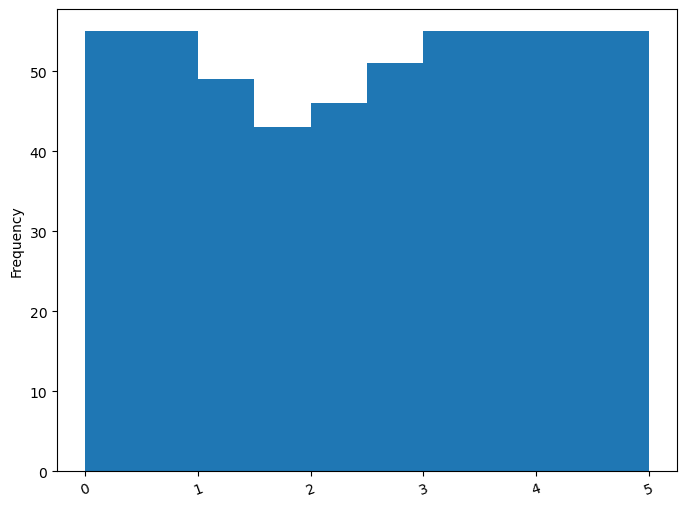

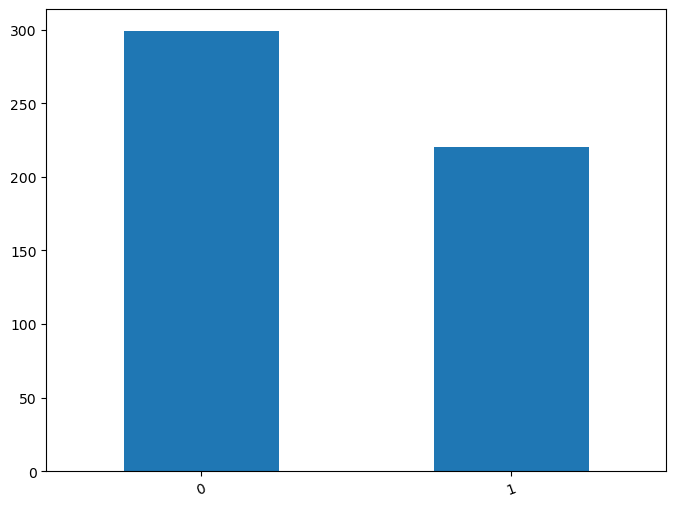

In [14]:
draw_graph(dev_df)

###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

